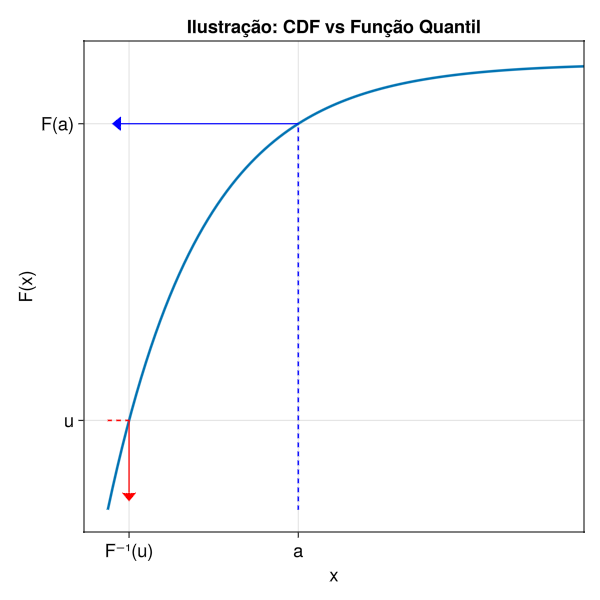

GLMakie.Screen(...)

In [4]:
using GLMakie

Makie.inline!(true)

const F_X(x, λ) = 1 - ℯ^(-λ * x)
const F_inv(u, λ) = -log(1 - u) / λ

λ = 0.5
a = 4.0      
u = 0.2 
f_a = F_X(a, λ)
f_inv_u = F_inv(u, λ)


fig = Figure(size = (600, 600), fontsize = 18)
ax = Axis(fig[1, 1], 
    title = "Ilustração: CDF vs Função Quantil",
    xlabel = "x", ylabel = "F(x)",
    xticks = ([a, f_inv_u], ["a", "F⁻¹(u)"]), # Rótulos nos ticks
    yticks = ([u, f_a], ["u", "F(a)"]))

xs = 0:0.1:12
lines!(ax, xs, F_X.(xs, λ), linewidth = 2.5)
lines!(ax, [a, a], [0, f_a], color = :blue, linestyle = :dash)
arrows2d!(ax, [a], [f_a], [-a + 0.1], [0.0], color = :blue, shaftwidth = 1)
lines!(ax, [0, f_inv_u], [u, u], color = :red, linestyle = :dash)
arrows2d!(ax, [f_inv_u], [u], [0.0], [-u + 0.02], color = :red, shaftwidth = 1)

ylims!(ax, -0.05, 1.05)
xlims!(ax, -0.5, 10)

display(fig)

# Método da Transformada Inversa

> Basta conseguir calcular a inversa da acumulada (Função Quantil) :)

O método da transformada inversa é um método para gerar realizações de _qualquer_ tipo de distribuição a partir de uma **distribuição uniforme** e da Função de Distribuição Acumulada $F_X(x) = P_X(X<x)$ da distribuição desejada.

A ideia é a seguinte, dado um número aleatório escolhido uniformemente, vamos joga-lo em $F^{-1}_X(x)$. Dessa forma vamos ter como retorno uma realização da distribuição desejada.

A inversa da F.D.A também é chamada de _Função Quantil_.

## Exemplo com Distribuição Exponencial

$$X \sim \mathcal{exponencial}(λ)$$

$$F_X(x) = P(X<x) = 1-ℯ^{-λx}$$ $$⟹ y = 1 - ℯ^{-λx} ⟹ ℯ^{-λx} = 1 - y$$

Aplicando $\mathcal{ln}$ dos dois lados.

$$-λx = ln(1-y) ⟹ x = - \frac{ln(1-y)}{\lambda} ∴ F^{-1}_X(u) = - \frac{ln(1-u)}{\lambda}$$

In [4]:
"""
## Linear Congruencial Generator

Gerador de números _pseudo-aleatórios_ uniforme.
"""
const lcg_step(multiplier, prior, increment, modulando) = begin
    (multiplier * prior + increment) % modulando
end

"""
Preenche uma lista com n números aleatórios através do lcg_step.
"""
function generate_random!(random::Array{Float64}, n)
    @assert 0 < n ≤ length(random) "n can't be greater then the size of the point list."
    x1 = 274212
    for i ∈ 2:n
        x1 = lcg_step(x1, 305641, 30321, 11420107)
        random[i] = (x1 / 11420107)
    end
    random
end

generate_random!

In [7]:
size = 1000000

# Lista com números aleatórios
random_u = zeros(size)
generate_random!(random_u, size)

const f_X_teorica(x, λ) = λ * exp(-λ * x)


# Calculamos novos x de uma distribuição exponencial através do método da transformada inversa.
realizações = F_inv.(random_u, λ)
# Calculo a probabilidade desse x ocorrer.
ys = f_X_teorica.(realizações, λ)

1000000-element Vector{Float64}:
 0.5
 0.07465166482240493
 0.1081604576909831
 0.2691216028010946
 0.09447420238707042
 0.18836425963434494
 0.33935137385315217
 0.19192832431429935
 0.16364421979583904
 0.3816550930739966
 0.44297470242616815
 0.22969670949667986
 0.23065974775893078
 ⋮
 0.41298676098218695
 0.18528582963364532
 0.4449275300135104
 0.09387333236019589
 0.037848375676339974
 0.014062565263180116
 0.0951820766653062
 0.04376653388624118
 0.3458559976714754
 0.2716567804487296
 0.44870560319618724
 0.3279389588906654

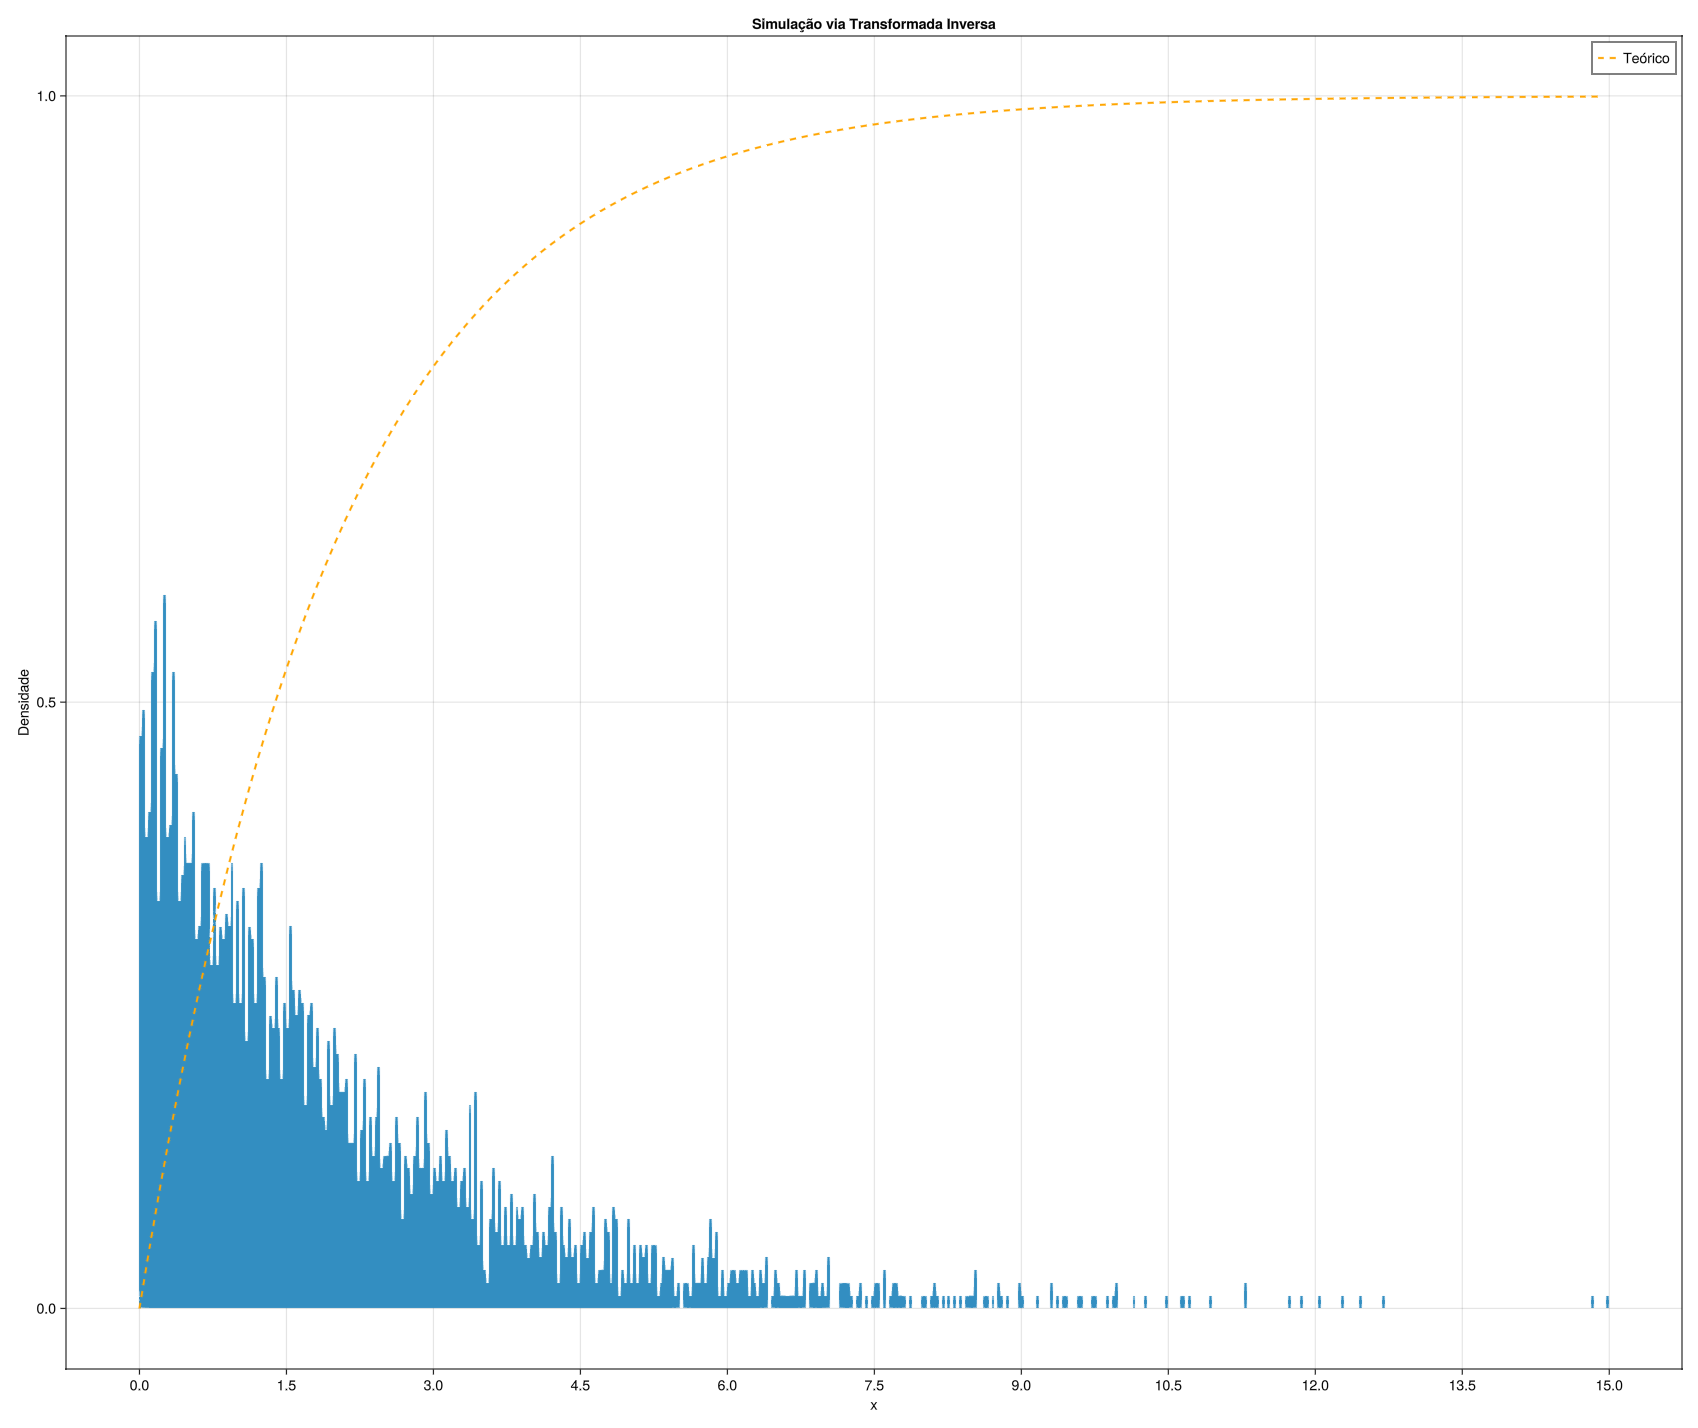

GLMakie.Screen(...)

In [ ]:
using GLMakie
fig_2 = Figure(size = (600, 600))
axis_2 = Axis(fig_2[1,1], 
    title = "Simulação via Transformada Inversa",
    xlabel = "x", ylabel = "Densidade",
    xticks = LinearTicks(16)
    )


hist!(axis_2, realizações, bins = 500, normalization = :pdf
# , bar_labels = :y
 )

range_x = 0:0.1:maximum(realizações)
lines!(axis_2, range_x, f_X_teorica.(range_x, λ), color = :orange, colorrange = (1, 10), linewidth = 2, linestyle = :dash,label = "Teórico")


axislegend(axis_2)
display(fig_2)